#Anomaly detection and Time Series


1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
   - Anomaly detection (also called outlier detection) is the process of identifying data points, events, or observations that deviate significantly from the majority of the data. Such anomalies often indicate critical incidents (e.g., fraud, network intrusion, or machine failure) or novel insights (e.g., unexpected customer behavior).
   - Anomalies can be broadly categorized into three main types: point, contextual, and collective anomalies.
   - Point Anomalies: A data point that is significantly different from the rest of the data.
   - Contextual Anomalies (Conditional anomalies): A data point is considered anomalous only in a specific context (depends on time, location, or situation). Context is important, unlike point anomalies.
   - Collective Anomalies:A group of data points collectively behaves anomalously, even if individual points look normal.




2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.
   - Isolation Forest:
      - Approach: Uses random trees to isolate points. Anomalies are easier to isolate.
      - Use Cases: Works well with large, high-dimensional data such as fraud detection or intrusion detection.
   - DBSCAN:
       - Approach: Density-based clustering. Points in low-density areas are marked as outliers.
       - Use Cases: Best for spatial/geographical data, GPS patterns, or sensor anomalies.
  - Local Outlier Factor (LOF):
      - Approach: Compares local density of a point with its neighbors. Lower density points are anomalies.
      - Use Cases: Useful where anomalies are relative to neighbors, e.g., customer spending behavior.

3.  What are the key components of a Time Series? Explain each with one
example.
   - A time series is a sequence of data points collected or recorded at regular time intervals. To analyze and forecast a time series, we break it into four main components.
   - a. Trend (T): The long-term increase or decrease in the data over time.Example: The steady rise in the number of internet users worldwide over the last 20 years.
   - b. Seasonality (S): Regular and repeating short-term patterns in data, usually linked to calendar periods (daily, weekly, monthly, yearly).Example: Ice cream sales increase every summer and drop in winter.
   - c. Cyclical Component (C): Fluctuations that occur over longer, irregular periods (more than a year), often tied to economic or business cycles. Unlike seasonality, cycles are not fixed or regular. Example: Stock market boom and recession phases.
   - d. Irregular or Random Component (R):Unpredictable variations in the data due to unexpected events, noise, or one-time shocks. Example: A sudden drop in airline passengers during the COVID-19 pandemic.

4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
   - A time series is stationary if its statistical properties (mean, variance, covariance) remain constant over time. Most forecasting models (like ARIMA) require stationary data.
   - How to Test Stationarity: Visual inspection of plots. Compare summary statistics over different periods. Statistical tests: ADF Test: H₀ = Non-stationary.KPSS Test: H₀ = Stationar
   - How to Make a Series Stationary: Differencing: Subtract current value from previous. Log Transformation: Stabilizes variance. Detrending: Remove long-term trend. Seasonal Differencing: Subtract seasonal lags.

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
    - AR (Autoregressive): Uses past values to predict future (order p). Example: stock prices.
    - MA (Moving Average): Uses past forecast errors to predict (order q). Example: noise-driven data.
    - ARIMA: Combines AR + differencing (to remove trend) + MA → (p,d,q). Example: sales with trend.
    - SARIMA: ARIMA + seasonal terms (P,D,Q,m). Handles seasonality. Example: electricity demand, temperature.
    - SARIMAX: SARIMA + external regressors (X). Example: sales with promotions or weather impact on energy

6. Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components.


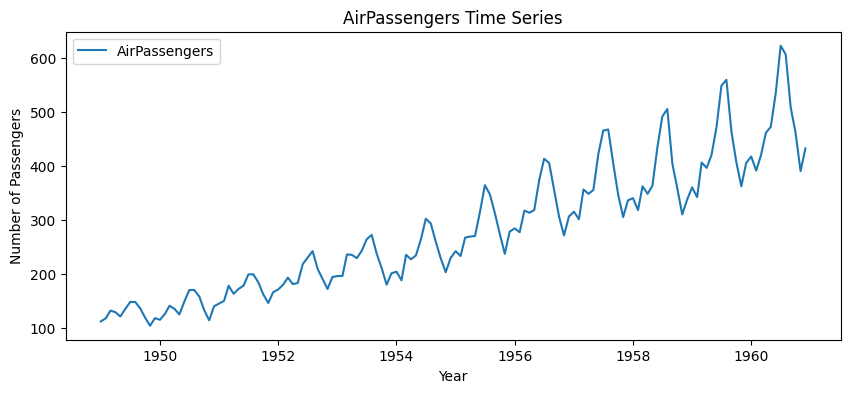

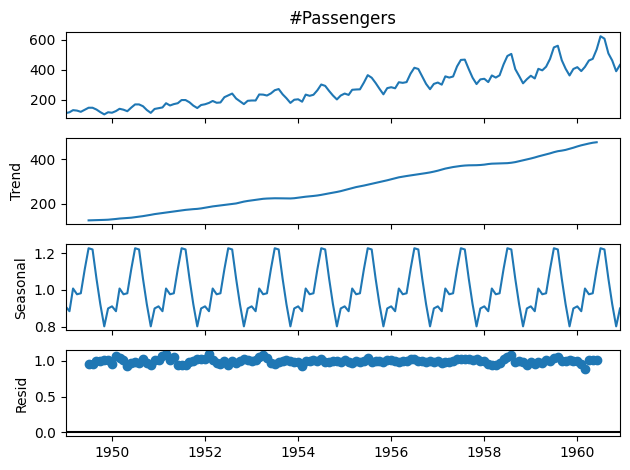

In [3]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset (AirPassengers)
url = "/content/AirPassengers.csv"
data = pd.read_csv(url)

# Convert 'Month' column to datetime and set as index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot original series
plt.figure(figsize=(10,4))
plt.plot(data['#Passengers'], label="AirPassengers")
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Decompose the time series (multiplicative model)
decomposition = seasonal_decompose(data['#Passengers'], model='multiplicative')

# Plot decomposition
decomposition.plot()
plt.show()

7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

In [5]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


url = "/content/NYC_taxi_fare_data.csv"
data = pd.read_csv(url, nrows=5000)

data.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

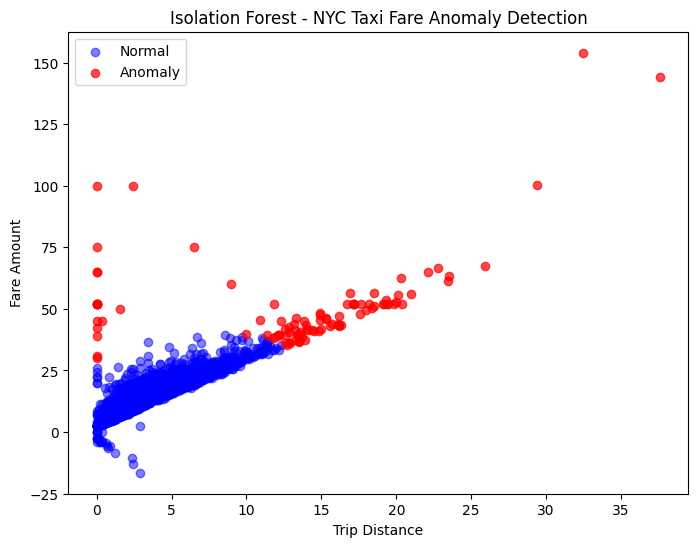

In [7]:
df = data[['trip_distance', 'fare_amount']].dropna()

#Apply Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = iso.fit_predict(df)

#Separate normal and anomalies
normal = df[df['anomaly'] == 1]
anomalies = df[df['anomaly'] == -1]

#Visualization (2D scatter plot)
plt.figure(figsize=(8,6))
plt.scatter(normal['trip_distance'], normal['fare_amount'],
            c='blue', label='Normal', alpha=0.5)
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'],
            c='red', label='Anomaly', alpha=0.7)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest - NYC Taxi Fare Anomaly Detection")
plt.legend()
plt.show()

8. Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


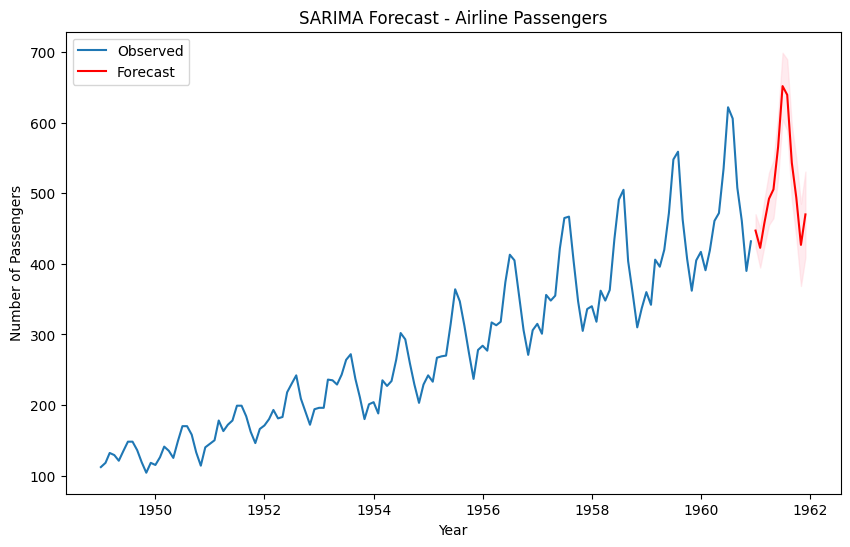

In [9]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Load dataset
url = "/content/AirPassengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

print(data.head())

#Train SARIMA model

sarima_model = sm.tsa.statespace.SARIMAX(
    data['#Passengers'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = sarima_model.fit(disp=False)

#Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

#Visualization
plt.figure(figsize=(10,6))
plt.plot(data.index, data['#Passengers'], label="Observed")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean,
         label="Forecast", color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMA Forecast - Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

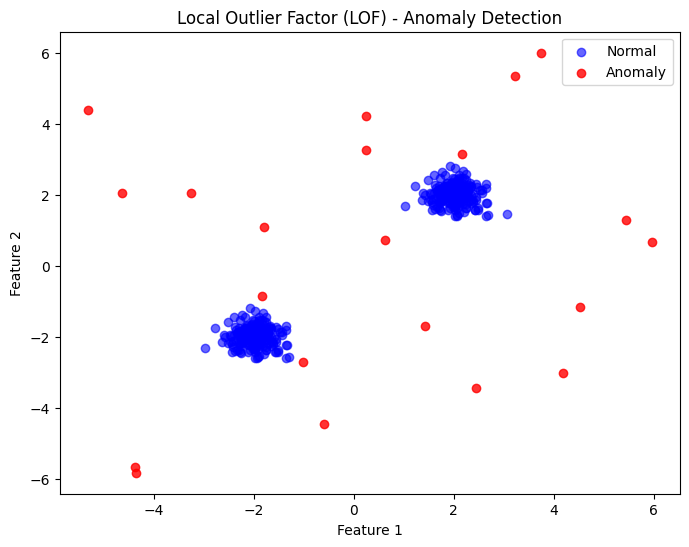

In [10]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

#Generate synthetic numerical data
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(200, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

#Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# -1 = anomaly, 1 = normal
normal = X[y_pred == 1]
anomalies = X[y_pred == -1]

#Visualization
plt.figure(figsize=(8,6))
plt.scatter(normal[:, 0], normal[:, 1], c="blue", label="Normal", alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c="red", label="Anomaly", alpha=0.8)
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?
(Include your Python code and output in the code box below.)


Real-Time Power Grid Monitoring Workflow
1. Anomaly Detection in Streaming Data
    - I would use Isolation Forest because:Scales well to large, streaming datasets. Detects both spikes (high demand) and drops (low demand). LOF/DBSCAN are good for batch analysis, but Isolation Forest is more efficient in real-time.
2. Time Series Forecasting:
   - Use SARIMAX (Seasonal ARIMA with exogenous features): Handles seasonality (daily/weekly usage cycles). Incorporates weather conditions (temperature, humidity, etc.) as external regressors.This is better than plain ARIMA/SARIMA because weather strongly impacts energy demand.
3. Validation and Monitoring:
   - Walk-forward validation for time series. Metrics: MAPE, RMSE for forecast; precision/recall for anomalies. Monitoring: real-time dashboards (Grafana/Power BI), model drift detection, retraining periodically.  

4. Business Benefits:
   - Prevent outages by detecting abnormal spikes. Optimize power generation → reduce costs and wastage. Demand response planning → adjust pricing during peak load. Customer reliability → ensures uninterrupted service.   


/tmp/ipython-input-1207222325.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range(start="2023-01-01", periods=24*4*30, freq="15T")  # 1 month data


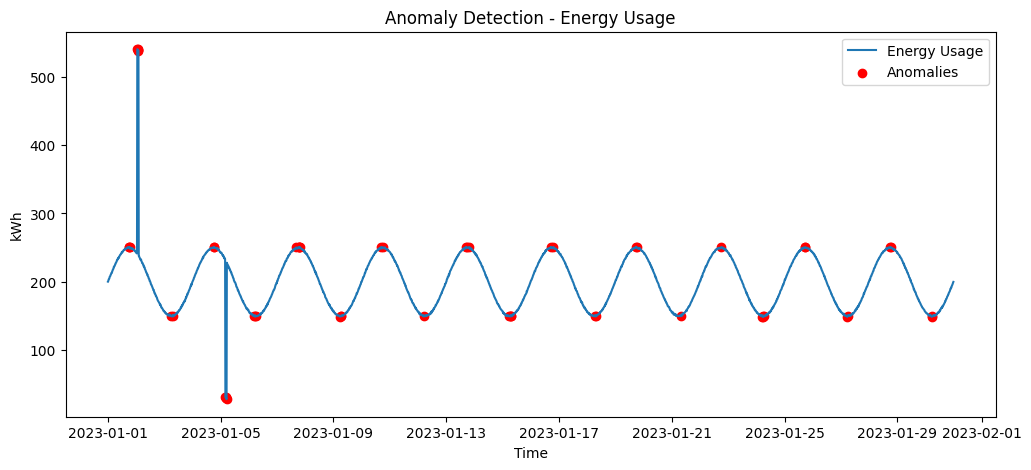

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import statsmodels.api as sm

# Step 2: Create synthetic dataset (energy usage every 15 minutes)
np.random.seed(42)
time_index = pd.date_range(start="2023-01-01", periods=24*4*30, freq="15T")  # 1 month data
base_load = 200 + 50*np.sin(np.linspace(0, 20*np.pi, len(time_index)))  # seasonality
weather_effect = 0.5 * np.random.randn(len(time_index))  # random weather effect
energy_usage = base_load + weather_effect

# Add anomalies (spikes and drops)
energy_usage[100:105] += 300   # spike
energy_usage[400:405] -= 200   # drop

df = pd.DataFrame({"timestamp": time_index, "energy_usage": energy_usage})
df.set_index("timestamp", inplace=True)

# Step 3: Anomaly detection using Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
df["anomaly"] = iso.fit_predict(df[["energy_usage"]])

# Separate normal vs anomalies
normal = df[df["anomaly"] == 1]
anomalies = df[df["anomaly"] == -1]

# Plot anomalies
plt.figure(figsize=(12,5))
plt.plot(df.index, df["energy_usage"], label="Energy Usage")
plt.scatter(anomalies.index, anomalies["energy_usage"], color="red", label="Anomalies")
plt.title("Anomaly Detection - Energy Usage")
plt.xlabel("Time")
plt.ylabel("kWh")
plt.legend()
plt.show()

# Step 4: SARIMAX Forecasting (next 12 hours)
model = sm.tsa.statespace.SARIMAX(df["energy_usage"],
                                  order=(1,1,1),
                                  seasonal_order=(1,1,1,96), # 96 intervals per day (15-min freq)
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.get_forecast(steps=96//2)  # next 12 hours
forecast_ci = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(12,5))
plt.plot(df.index, df["energy_usage"], label="Observed")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color="red", label="Forecast")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1],
                 color="pink", alpha=0.3)
plt.title("SARIMAX Forecast - Energy Demand (Next 12 Hours)")
plt.xlabel("Time")
plt.ylabel("kWh")
plt.legend()
plt.show()
